<a href="https://colab.research.google.com/github/SwenFereira/Face-Emotion-Recognition-/blob/main/Final_Copy_of_Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Face Emotion Recognition (Live Class Monitoring System)**

# **Introduction:**

- The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms
- Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms
- One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge
- In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention

# **Problem Statements:**

- Digital classrooms are conducted via video telephony software program (ex- Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
- While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts.which can be analysed using deep learning algorithms.
- Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.
- To solve this above problem and challenges.

 **We have a solution to rectify those issues with help of Deep Learning Algorithms using Convolution Neural Networks.It is Facial Emotions Recognition Application.**

# **Our Approch:**

### **Step 1. Build Model**

We have used Five different models as follows:

- Model 1- Mobilenet Model
- Model 2- Dexpression Model
- Model 3- CNN Model
- Model 4- Densenet Model
- Model 5- Resnet Mode

### **Step 2. Real Time Prediction:**

And then we perform Real Time Prediction on our best model using webcam on Google colab itself.

  - Run webcam on Google Colab
  - Load our best Model
  - Real Time prediction

###**Step 3. Deployment:**

And lastly we have deployed it on Amazon WEB Services (AWS)

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing all Necessary Libraries:**

In [ ]:
#Importing the libraries
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#Importing Libraires required for CNN models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,Callback
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D, SeparableConv2D,Input, GlobalAveragePooling2D,concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,roc_curve, roc_auc_score,confusion_matrix
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121

# **Loading Datasets:**

In [ ]:
#Reading data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Projects /Face Emotion Recognition/fer2013.csv")

In [ ]:
#print first five rows
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#shape of the dataset
df.shape

(35887, 3)

In [ ]:
#checking for null values
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [ ]:
#emotion class
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
#lable of different emotion
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

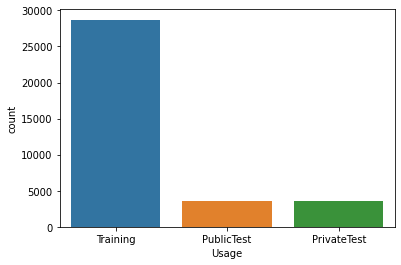

In [ ]:
# Let's plot the count of each set
sns.countplot(df.Usage)
plt.show()

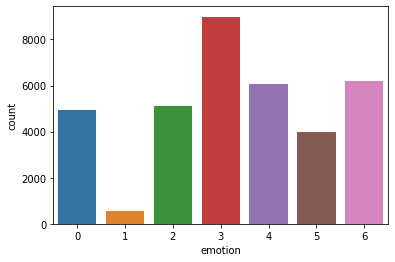

In [ ]:
#plot for value count
sns.countplot(df.emotion)
plt.show()

Our dataset have 7 types of emotion ranging form 0-6:

- Anger
- Disgust
- Fear
- Happiness
- Sad
- Surprise
- Neutral

After looking bar plot we can observe that majority of the classes belongs to Happy,Sad and Neutral on the otherside anger, Fear and surprise are average and disgust is very low in number.